# Blackjack Simulator: Cheating Dealer Edition 🎲🃏

This Jupyter Notebook is an interactive **Blackjack game simulator** designed to explore probabilities, strategies and the impact of a **weighted (cheating) dealer**.

## Overview
The project simulates rounds of Blackjack between a player and a dealer, implementing standard Blackjack rules:
- Cards 2–10 are valued at their number  
- J, Q, K = 10  
- Ace = 1 or 11 (whichever benefits the hand)

The dealer uses a **weighted deck**, increasing the likelihood of drawing high value cards, giving them an advantage over the player. This allows for analysis of how “cheating” affects game outcomes.

## Features
- Simulate **single or multiple rounds** of Blackjack  
- Track **player and dealer hand totals** and round outcomes  
- Compare results with a **normal dealer vs. cheating dealer**  
- Generate **visualisations**: bar charts, histograms, and cumulative win rates  
- Explore **probabilities, expected values, and game strategies**  

This notebook is a combination of **game simulation, probability analysis, and data visualisation**, demonstrating Python programming and interactive notebook design.


In [1]:
import random
import matplotlib
import pandas

In [2]:
deck = {
    '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10,
    'J': 10, 'Q': 10, 'K': 10, 'A': 11
}

In [3]:

#  if want to do single round simulation, uncomment below

# # Draw cards for player and dealer
# playerHand = random.choices(
#     population=list(deck.keys()),
#     weights=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
#     k=2
# )

# dealerHand = random.choices(
#     population=list(deck.keys()),
#     weights=[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
#     k=2
# )
# print("Dealer Hand:", dealerHand[0], "?")
# print("Player Hand:",playerHand)
# print("Total:", sum([deck[card] for card in playerHand]))


# # Single round simulation
# while True:
#     choice = input("Do you want to hit or stand? (h/s): ").lower()
#     if choice == 'h':
#         card = random.choices(
#     population=list(deck.keys()),
#     weights=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
#     k=1)
#         playerHand.append(card[0])
#         total = sum([deck[card] for card in playerHand])
#         print("Player Hand:", playerHand)
#         print("Total:", total)
#         if total > 21:
#             print("Bust! You lose.")
#             exit()
#     elif choice == 's':
#         break


# # Dealer's turn
# print("Dealer's turn...")
# print("Dealer Hand:", dealerHand)
# while sum([deck[card] for card in dealerHand]) < 17:
#     card = random.choices(
#         population=list(deck.keys()),
#         weights=[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
#         k=1
#     )
#     dealerHand.append(card[0])
#     print("Dealer Hand:", dealerHand)
# dealerTotal = sum([deck[card] for card in dealerHand])
# playerTotal = sum([deck[card] for card in playerHand])
# print("Dealer Total:", dealerTotal)
# print("Player Total:", playerTotal)
# # Determine winner
# if dealerTotal > 21 or playerTotal > dealerTotal:
#     print("You win!")
# elif playerTotal < dealerTotal:
#     print("Dealer wins!")
# else:
#     print("It's a tie!")




In [12]:
# play n rounds and collect statistics
n = int(input("Enter number of rounds to simulate: "))
results = {'Player Wins': 0, 'Dealer Wins': 0, 'Ties': 0}
playerTotalSum = 0
dealerTotalSum = 0
for _ in range(n):
    # Draw cards for player and dealer
    playerHand = random.choices(
        population=list(deck.keys()),
        weights=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        k=2
    )
    dealerHand = random.choices(
        population=list(deck.keys()),
        weights=[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
        k=2
    )

    # Player's turn (simple strategy: hit until 17 or higher)
    while sum([deck[card] for card in playerHand]) < 17:
        card = random.choices(
            population=list(deck.keys()),
            weights=[1,1,1,1,1,1,1,1,1,1,1,1,1],
            k=1
        )
        playerHand.append(card[0])
        if sum([deck[card] for card in playerHand]) > 21:
            results['Dealer Wins'] += 1
            break
    else:
        # Dealer's turn
        while sum([deck[card] for card in dealerHand]) < 17:
            card = random.choices(
                population=list(deck.keys()),
                weights=[1,1,1,1,1,1,1,2,2,2,2,2,2],
                k=1
            )
            dealerHand.append(card[0])
        dealerTotal = sum([deck[card] for card in dealerHand])
        playerTotal = sum([deck[card] for card in playerHand])
        if dealerTotal > 21 or playerTotal > dealerTotal:
            results['Player Wins'] += 1
        elif playerTotal < dealerTotal:
            results['Dealer Wins'] += 1
        else:
            results['Ties'] += 1
        
        playerTotalSum += sum([deck[card] for card in playerHand])
        dealerTotalSum += sum([deck[card] for card in dealerHand])
print("After", n, "rounds:")
print(results)

After 100 rounds:
{'Player Wins': 34, 'Dealer Wins': 57, 'Ties': 9}


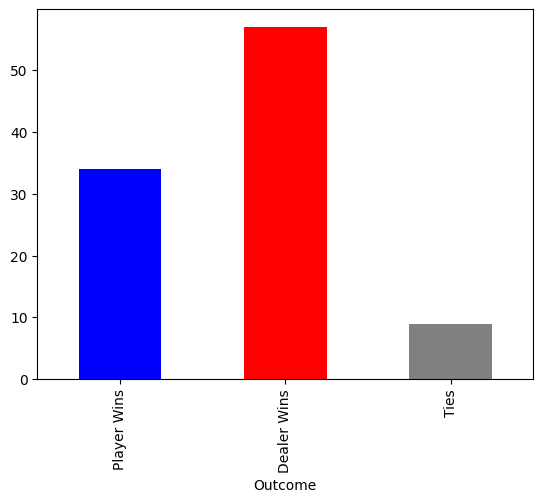

Probabilities: {'Player Wins': 0.34, 'Dealer Wins': 0.57, 'Ties': 0.09}
Average hand value for player: 12.48
Average hand value for dealer: 13.79


In [13]:
df = pandas.DataFrame(list(results.items()), columns=['Outcome', 'Count'])
df.plot(kind='bar', x='Outcome', y='Count', legend=False, color=['blue', 'red', 'gray'])
matplotlib.pyplot.show()
probabilities = {key: value / n for key, value in results.items()}
print("Probabilities:", probabilities)

average_hand = playerTotalSum / n
print("Average hand value for player:", average_hand)
average_dealer_hand = dealerTotalSum / n
print("Average hand value for dealer:", average_dealer_hand)
